In [16]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [9]:
# input: - set of images to be displayed
#        - the amount of images per row and column
# returns: nothing
# effect: displays the images ordered with rows and columns given
def plotNImages(imgs, row, col, titles=[], figsize=(3,15)):
    fig, ax = plt.subplots(row, col, figsize=figsize)
    fig.dpi = 700
    index = len(imgs)-1
    for j in range(row):
        for k in range(col):
            if(index < len(imgs)):
                if(row > 1 and col > 1):
                    ax[j,k].imshow(imgs[index]);
                    if(len(titles) > 0):
                        ax[j,k].set_title(titles[index], fontsize=5)
                    ax[j,k].set_xticks([])
                    ax[j,k].set_yticks([])
                else:
                    ax[max(j, k)].imshow(imgs[index])
                    if(len(titles) > 0):
                        ax[max(j,k)].set_title(titles[index], fontsize=5)
                    ax[max(j,k)].set_xticks([])
                    ax[max(j,k).set_yticks([])

            index -= 1
    fig.tight_layout()
    plt.draw()

In [197]:
def comic(img, canny_threshs=[100,110]):
    # edge detection on grayscale image for faster results
    gray = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
    edges = cv2.blur(gray, (3, 3)) # get rid of noise
    edges = cv2.Canny(edges, canny_threshs[0], canny_threshs[1], apertureSize=3) # detect edges

    # make edges thicker
    kernel = np.ones((3,3), dtype=np.float) / 15.0
    edges = cv2.filter2D(edges, 0, kernel)
    edges = cv2.threshold(edges, 50, 255, 0)[1]

    # convert back to BGR image (that's cv2's order not RGB)
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # use a faster, more comprehnesible version of
    # a bilateral filter mean shift
    shifted = cv2.pyrMeanShiftFiltering(img, 5, 20)

    # now compose with the edges, the edges are white so take them away
    # to leave black
    return cv2.subtract(shifted, edges)

In [191]:
orig_image = cv2.cvtColor(cv2.imread('foto_kyra.jpg'), cv2.COLOR_BGR2RGB)
small_orig = orig_image
# small_orig = cv2.resize(orig_image, (0,0), fx=0.7, fy=0.7)

In [198]:
filtered_img = comic(small_orig, [75, 100])

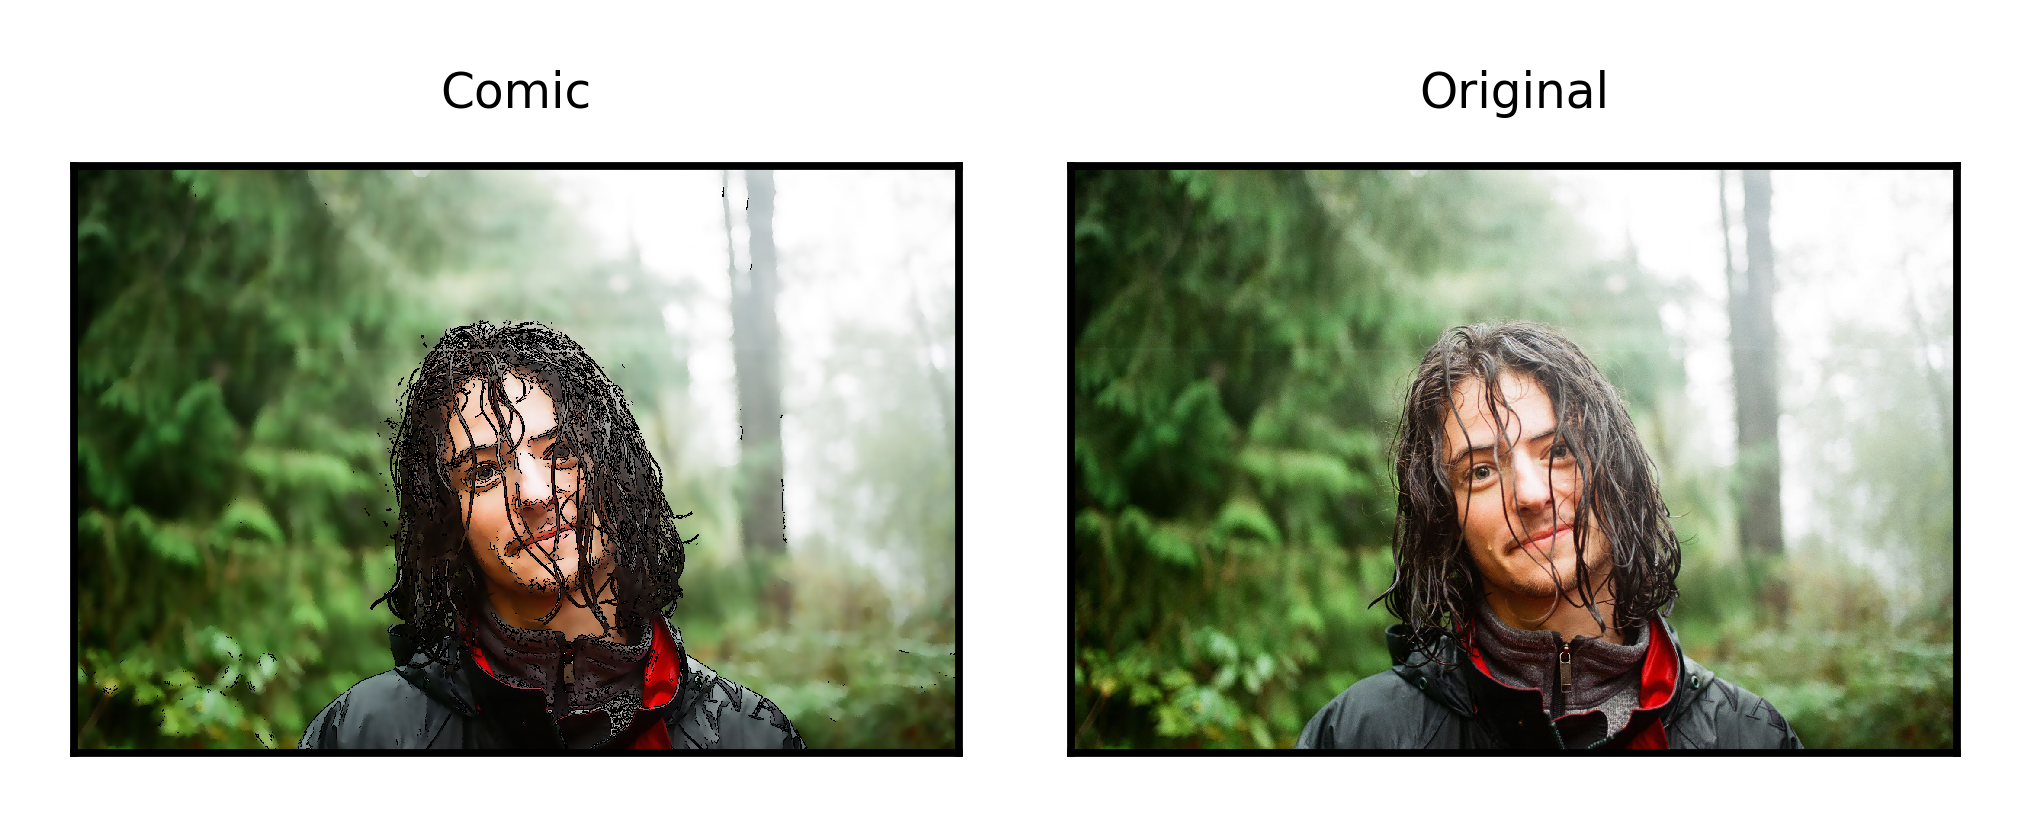

In [199]:
plotNImages([small_orig, filtered_img], 1, 2, titles=['Original', 'Comic'])

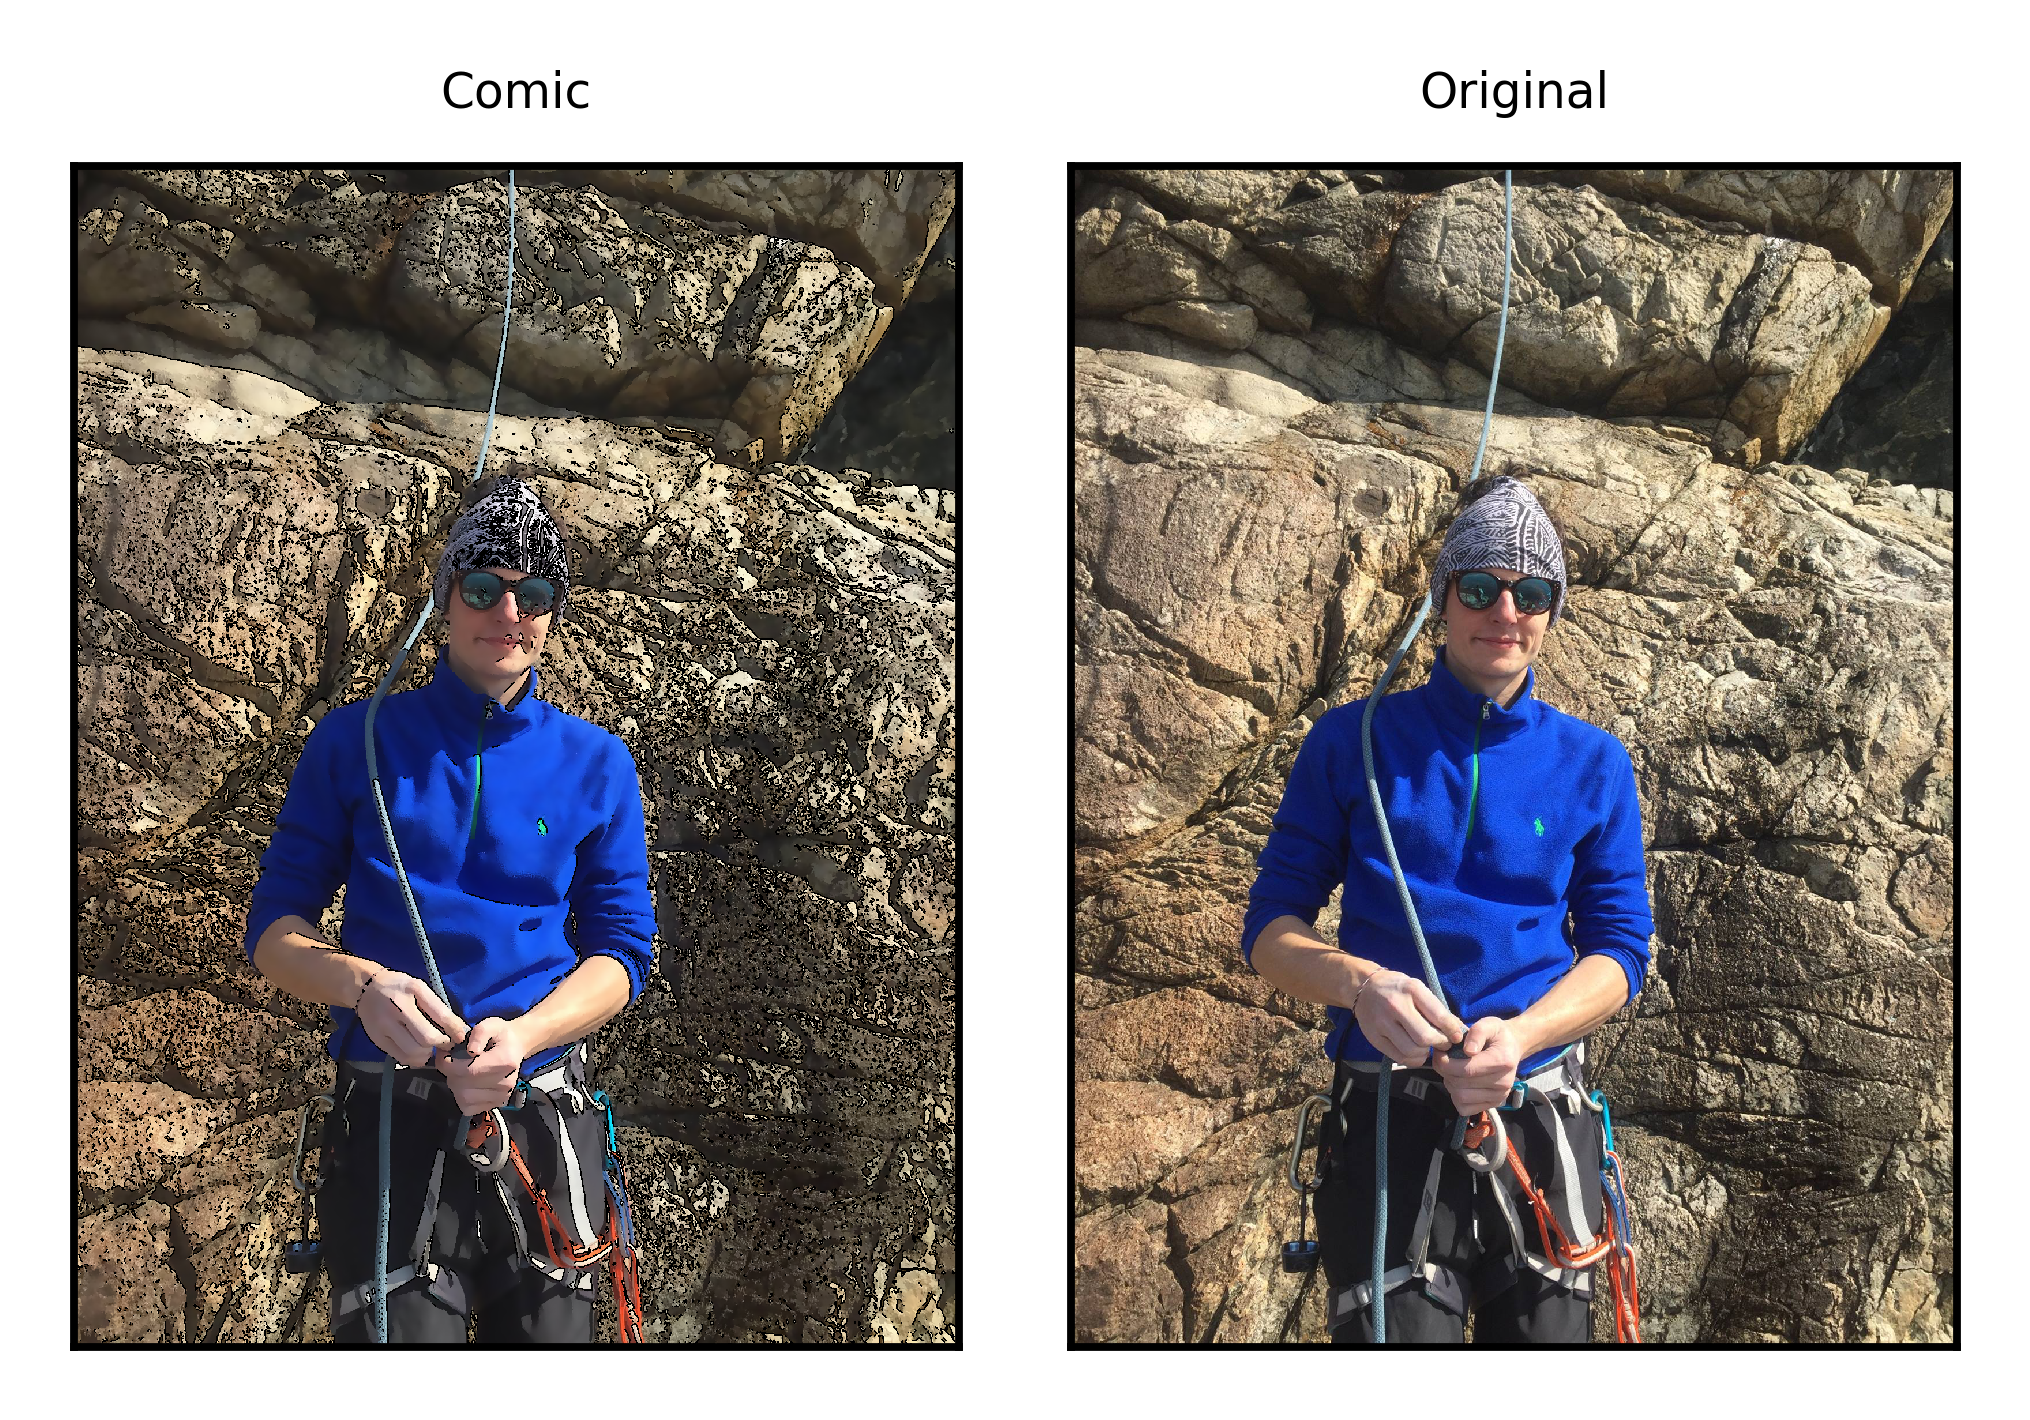

In [202]:
foto_escalando = cv2.cvtColor(cv2.imread('foto_escalando.jpg'), cv2.COLOR_BGR2RGB)
small_foto = foto_escalando
filtered_foto = comic(small_foto, [200, 210])
plotNImages([foto_escalando, filtered_foto], 1, 2, titles=['Original', 'Comic'])